In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import glob
from pprint import pprint
np.set_printoptions(threshold=np.inf)

# 做自定义数据集
1、得到图像的路径image_path和对应的labels

In [2]:
image_path=glob.glob(r'E:\人脸\Man_Woman\*\*.jpg')#把男人和女人的脸的图像路径都获取到了
print(len(image_path))
pprint(image_path[:3])#前3张
pprint(image_path[-3:])#后3张

3338
['E:\\人脸\\Man_Woman\\man\\001963175c5b494fb1413f0e0d7a5f3c_.jpg',
 'E:\\人脸\\Man_Woman\\man\\001bd9c52a9f4a27b7cfa1d72628f58b_.jpg',
 'E:\\人脸\\Man_Woman\\man\\001d5cd7991a4467af9e965b9b3f3dac_.jpg']
['E:\\人脸\\Man_Woman\\woman\\ff631138f2de45dead2cdbbf35ce7503_.jpg',
 'E:\\人脸\\Man_Woman\\woman\\ff81241a9e084575a8e58c1603d3a223_.jpg',
 'E:\\人脸\\Man_Woman\\woman\\ffe00a2cafee4d86bea6bd6133133d4c_.jpg']


In [3]:
np.random.seed(123)
np.random.shuffle(image_path)
pprint(image_path[:3])#前3张
pprint(image_path[-3:])#后3张

['E:\\人脸\\Man_Woman\\woman\\3125481a31114a3cbb7e35107fd8649f_.jpg',
 'E:\\人脸\\Man_Woman\\woman\\18a4f58c6ab8482a8b47e5abff1b1f6b_.jpg',
 'E:\\人脸\\Man_Woman\\man\\1a473dbc051f417d998ef086afc2146d_.jpg']
['E:\\人脸\\Man_Woman\\man\\c1b7335f37dc4b5988472fe737d2a72f_.jpg',
 'E:\\人脸\\Man_Woman\\man\\7cf894bb7eed4a7484d3baa7bb5d2a22_.jpg',
 'E:\\人脸\\Man_Woman\\man\\96214b5dccc54548a98f314c20648817_.jpg']


In [4]:
labels=[path.split('\\')[-2] for path in image_path]#提取出所有的label，比如对于第一张图片来说，先切分成path,在提取label
pprint(labels)

['woman',
 'woman',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'woman',
 'woman',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'woman',
 'man',
 'man',
 'man',
 'woman',
 'woman',
 'man',
 'woman',
 'woman',
 'man',
 'woman',
 'woman',
 'woman',
 'man',
 'woman',
 'woman',
 'man',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'woman',
 'man',
 'woman',
 'woman',
 'woman',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'woman',
 'woman',
 'man',
 'woman',
 'man',
 'man',
 'man',
 'man',
 'woman',
 'man',
 'woman',
 'man',
 'man',
 'woman',
 'woman',
 'man',
 'man',
 'man',
 'woman',
 'ma

In [5]:
#用0代表man,用1代表woman
np.unique(labels)#用np.unique取出一共有多少分类

array(['man', 'woman'], dtype='<U5')

In [8]:
#变成字典
name_to_index=dict((name,i) for i,name in enumerate(np.unique(labels)))
print(name_to_index)

{'man': 0, 'woman': 1}


In [9]:
index_to_name=dict((i,name) for i,name in enumerate(np.unique(labels)))
print(index_to_name)

{0: 'man', 1: 'woman'}


In [10]:
labels=[name_to_index.get(name) for name in labels]
pprint(labels)

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [11]:
#创建dataset之前把image_path转换成为ndarray
image_path=np.array(image_path)#图片路径的ndarray
labels=np.array(labels)#labels的ndarray
print(image_path)
print(labels)

['E:\\人脸\\Man_Woman\\woman\\3125481a31114a3cbb7e35107fd8649f_.jpg'
 'E:\\人脸\\Man_Woman\\woman\\18a4f58c6ab8482a8b47e5abff1b1f6b_.jpg'
 'E:\\人脸\\Man_Woman\\man\\1a473dbc051f417d998ef086afc2146d_.jpg'
 'E:\\人脸\\Man_Woman\\man\\7a4140c225544387a0fd0a7577ced488_.jpg'
 'E:\\人脸\\Man_Woman\\man\\f273a1931fef4d8297014080dc9575ab_.jpg'
 'E:\\人脸\\Man_Woman\\woman\\67de0006558043468aea31bc9d974002_.jpg'
 'E:\\人脸\\Man_Woman\\man\\9c2b099ea28842a38c35ac952a57cf09_.jpg'
 'E:\\人脸\\Man_Woman\\man\\bd37fd45474c42b8b119714f3c16239a_.jpg'
 'E:\\人脸\\Man_Woman\\man\\2ab46e41df12496db2af7cb43d3ec2fb_.jpg'
 'E:\\人脸\\Man_Woman\\man\\5cf5c7c903dd43ce8f346ec203458293_.jpg'
 'E:\\人脸\\Man_Woman\\woman\\c68ef1a894584243af87bb8be65bfb0b_.jpg'
 'E:\\人脸\\Man_Woman\\man\\d8295f7434b04d4cb288efb67bd068a4_.jpg'
 'E:\\人脸\\Man_Woman\\man\\a25a5e4a1d6548438ff3d68483da9f78_.jpg'
 'E:\\人脸\\Man_Woman\\man\\91aced71d76447e886c6112a2daebd3a_.jpg'
 'E:\\人脸\\Man_Woman\\man\\36417c6bc9304e9ca7487c6ab214723e_.jpg'
 'E:\\人脸\\Man_Wom

# 以上完成image_path和labels的处理，下面开始
2、做dataset

In [12]:
#给一个路径然后调用函数加载图像，并对图像做预处理（就是你看把dataset封装成一个图像路径的数据集，然后对路径数据集进行加载）
def load_images(path):
    img=tf.io.read_file(path)#读取路径下的文件
    img=tf.image.decode_jpeg(img)#对读取到的图像进行解码就是正常的图像了
    img=tf.image.resize(img,(80,80)) #把图像resize到80*80
    img=tf.image.random_crop(img,[64,64,1])#把图像随机裁剪成64*64
    img=tf.image.random_flip_left_right(img)#把图像左右翻转
    img=img/127.5-1
    return img

In [13]:
 dataset_image_path=tf.data.Dataset.from_tensor_slices(image_path)

In [14]:
dataset_image=dataset_image_path.map(load_images)

In [15]:
pprint(dataset_image)

<MapDataset shapes: (64, 64, 1), types: tf.float32>


In [16]:
#标签的数据集
dataset_labels=tf.data.Dataset.from_tensor_slices(labels)

In [17]:
#图像+标签的数据集
dataset=tf.data.Dataset.zip((dataset_image,dataset_labels))  #((64,64,1),())

In [18]:
batch_size=32
noise_dim=100
images_num=len(image_path)
class_num=len(name_to_index)#类别的个数

In [19]:
dataset=dataset.shuffle(200).batch(batch_size)   #前面做了乱序，现在做小范围的shuffle就行

In [20]:
print(dataset)

<BatchDataset shapes: ((None, 64, 64, 1), (None,)), types: (tf.float32, tf.int32)>


# 生成器

In [21]:
def generator_model():
    noise=tf.keras.layers.Input(shape=((noise_dim)))#输入的噪声是100维
    label=tf.keras.layers.Input(shape=(()))#输入的标签是一个数，但是有10个类别
    
    x=tf.keras.layers.Embedding(2,50,input_length=1)(label)#把一个长度为1的标签，没有经过one_hot编码成一个50维的向量
    #2代表2个类，50代表50个神经元，输入是一个标量，所以输入长度是1
    
    #把x和noise合并在一起变成长度为150的向量
    x=tf.keras.layers.concatenate([noise,x])
    
    x=tf.keras.layers.Dense(4*4*64*8,use_bias=False)(x)
    
    x=tf.keras.layers.Reshape((4,4,64*8))(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.ReLU()(x)
    #下面开始反卷积：（4，4，64*8）→（8，8，64*4）→（16，16，64*2）→（32，32，64）→（64，64，1）
    #（4，4，64*8）→（8，8，64*4）
    x=tf.keras.layers.Conv2DTranspose(64*4,(5,5),strides=(2,2),padding='same',use_bias=False)(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.ReLU()(x)
    
    #(8，8，64*4）→（16，16，64*2）
    x=tf.keras.layers.Conv2DTranspose(64*2,(5,5),strides=(2,2),padding='same',use_bias=False)(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.ReLU()(x)
    
    #(16，16，64*2）→（32，32，64）
    x=tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same',use_bias=False)(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.ReLU()(x)
    #（32，32，64）→（64，64，1）
    x=tf.keras.layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same',use_bias=False)(x)
    x=tf.keras.layers.Activation('tanh')(x)
    
    model=tf.keras.Model(inputs=[noise,label],outputs=x)
    return model
    

In [22]:
#创建生成器模型
generator=generator_model()

# 判别器

In [23]:
def discriminator_model():
    image=tf.keras.layers.Input(shape=((64,64,1)))
#     label=tf.keras.layers.Input(shape=(()))
    
#     x=tf.keras.layers.Embedding(10,28*28,input_length=1)(label)  #将1维标量转化为28*28的向量
#     x=tf.keras.layers.Reshape((28,28,1))(x)
#     x=tf.keras.layers.concatenate([x,image])#合并到一起形状变成（28，28，2）
#     #tf.keras.layers.concatenate默认沿-1，最外边一层合并
    x=tf.keras.layers.Conv2D(64,(3,3),strides=(2,2),padding='same',use_bias=False)(image)  #(32,32,64)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    x=tf.keras.layers.Dropout(0.5)(x)#不要快速成为一个厉害的判别器
    
    x=tf.keras.layers.Conv2D(64*2,(3,3),strides=(2,2),padding='same',use_bias=False)(x)#(16,16,128)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    
    x=tf.keras.layers.Conv2D(64*4,(3,3),strides=(2,2),padding='same',use_bias=False)(x)#（3，3，128）
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    
    x=tf.keras.layers.Conv2D(64*8,(3,3),strides=(2,2),padding='same',use_bias=False)(x)#（3，3，128）
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    
    x=tf.keras.layers.Flatten()(x)
    
    S_out=tf.keras.layers.Dense(1)(x)#未激活的输出，判断图像的真假
    C_out=tf.keras.layers.Dense(2)(x)#分类输出，一共10类。
    
    model=tf.keras.Model(inputs=image,outputs=[S_out,C_out])#多输出模型
    return model
    

In [24]:
discriminator=discriminator_model()

# 损失函数和优化器

In [25]:
#真假损失
SLoss=tf.keras.losses.BinaryCrossentropy(from_logits=True)#二分类交叉熵损失

#增加一个分类损失
CLoss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  #y_true中的标签应为一个整数,而不是one-hot编码

In [26]:
#判别器损失，去掉fake_C_out的判别器损失
def discriminator_loss(real_S_out,real_C_out,fake_S_out,label):
    #real_S_out,真实图像的二分类输出。real_C_out，真实图像的类别输出。fake_S_out，假图像的二分类输出。fake_C_out，假图像的类别输出。label,标签
    real_loss=SLoss(tf.ones_like(real_S_out),real_S_out)
    real_class_loss=CLoss(label,real_C_out)#注意y_true和y_pred的顺序不能写反
    fake_loss=SLoss(tf.zeros_like(fake_S_out),fake_S_out)
#     fake_class_loss=CLoss(label,fake_C_out)
    
    return real_loss+real_class_loss+fake_loss

In [27]:
#生成器损失
def generator_loss(fake_S_out,fake_C_out,label):
    fake_loss=SLoss(tf.ones_like(fake_S_out),fake_S_out)
    fake_class_loss=CLoss(label,fake_C_out)
    return fake_loss+fake_class_loss

In [28]:
generator_optimizer=tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-5)

# 对一个批次的训练函数

In [29]:
def train_step(iamge,label):#接受一个批次的iamge和其对应的label，比如image是（64，28，28，1），label是（64，1）
    size=label.shape[0]#这个size就是一个批次的大小，label的shape也是[batch_size,1]的大小
    noise=tf.random.normal([size,noise_dim])
    
    with tf.GradientTape() as gen_tape,tf.GradientTape() as dis_tape:
        gen_images=generator((noise,label),training=True)
        fake_S_out,fake_C_out=discriminator(gen_images,training=True)
        real_S_out,real_C_out=discriminator(iamge,training=True)
        
        disc_loss=discriminator_loss(real_S_out,real_C_out,fake_S_out,label)
        gen_loss=generator_loss(fake_S_out,fake_C_out,label)
    
    #计算梯度
    gen_grad=gen_tape.gradient(gen_loss,generator.trainable_variables)  #生成器各参数的梯度
    dis_grad=dis_tape.gradient(disc_loss,discriminator.trainable_variables)#判别器各参数的梯度
    
    generator_optimizer.apply_gradients(zip(gen_grad,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(dis_grad,discriminator.trainable_variables))

# 绘图函数

In [30]:
nsample=10
noise_seed=tf.random.normal([nsample,noise_dim])#生成10个100维的固定的随机数
label_seed=np.random.randint(0,class_num,size=(nsample,1))
print(label_seed.T)

[[1 0 1 1 1 0 0 0 1 1]]


In [31]:
condition=[index_to_name.get(i) for i in label_seed.T[0]]
pprint(condition)

['woman',
 'man',
 'woman',
 'woman',
 'woman',
 'man',
 'man',
 'man',
 'woman',
 'woman']


In [32]:
def generator_plot_images(gen_model,test_noise,label):
    pred_images=gen_model((test_noise,label),training=False)
    fig=plt.figure(figsize=(10,1))
    for i in range(nsample):  #实际上就是pred_iamges.shape[0]
        plt.subplot(1,10,i+1)
        plt.imshow((pred_images[i,:,:,0]+1)/2,cmap='binary')#pred_images是[20,28,28,1],将像素由[-1,1]变换为[0,1]
        plt.title(condition[i])
        plt.axis('off')
    plt.show()

# 训练函数

In [33]:
def train(dataset,epochs):
    for epoch in range(epochs):
        for image_batch,label_batch in dataset:  #image_batch就是（64，28，28，1）
            train_step(image_batch,label_batch)
        if epoch%10==0:
            print('Epoch{}/{}'.format(epoch+1,epochs))
            generator_plot_images(generator,noise_seed,label_seed)

Epoch1/201


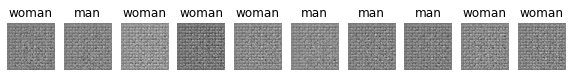

Epoch11/201


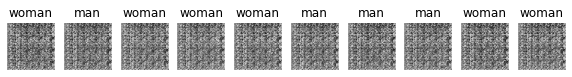

Epoch21/201


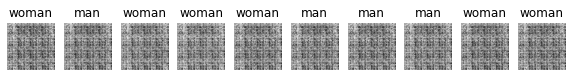

In [ ]:
epochs=201
train(dataset,epochs)#CGAN生成的图像边缘比较糊
#最终会打印出[[3 2 6 7 5 6 9 2 9 9]]，因为每次传入的是固定的随机变量和随机标签